# cDC subtype analysis - score DC cells with markers from Maier et al. Nature 2020 
Extended Figure 4B

- Author: CW
- files needed: 7_RNA_cDC_cells.rds, cDC_RNA_analysis/cDC_scoring_Nature2020_mDC.csv
- last updated: 04/11/24
- reference: Maier, B., Leader, A.M., Chen, S.T. et al. A conserved dendritic-cell regulatory program limits antitumour immunity. Nature 580, 257–262 (2020). https://doi.org/10.1038/s41586-020-2134-y. For genes used, refer to  Supplementary Table 2 from the manuscript. 

In [1]:
library(Seurat)

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.4 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode



In [4]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /net/bmc-lab5/data/kellis/users/cbw3/conda/envs/r-kernel/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] SeuratObject_5.0.1 Seurat_4.3.0.1    

loaded via a namespace (and not attached):
  [1] Rtsne_0.17             colorspace_2.1-0       deldir_2.0-4          
  [4] ggridges_0.5.6         IRdisplay_1.1          base64enc_0.1-3       
  [7] spatstat.data_3.0-4    leiden_0.4.3.1 

## Load cDC object

In [3]:
obj.cDC <- readRDS('/path_to_file/7_RNA_cDC_cells.rds')

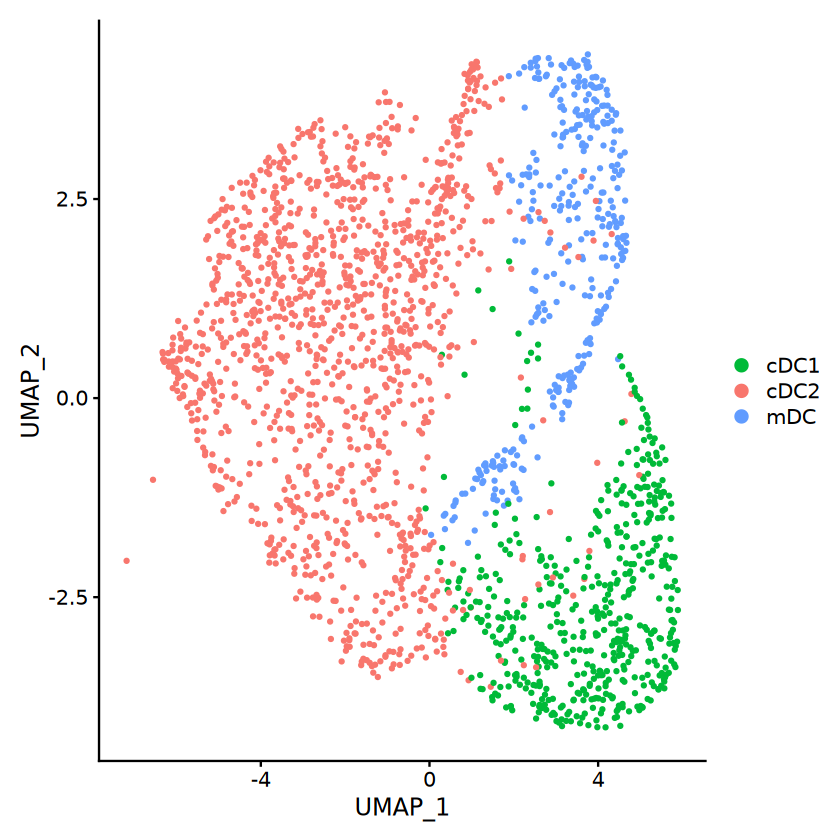

In [4]:
DimPlot(obj.cDC, cols =c('#00BA38', '#F8766D','#619CFF'))

In [6]:
cDC_genes <- read.csv('./cDC_RNA_analysis/cDC_scoring_Nature2020_mDC.csv', check.names = FALSE)

In [7]:
colnames(cDC_genes) <- c('gene_list', 'use', 'species', 'markers', 'score')

In [8]:
cDC_genes <- cDC_genes[cDC_genes$gene_list %in% c('human DC1 genes', 'human DC2 genes', 'human DC genes'),]

In [9]:
cDC_genes

gene_list          use                                     species
15 human DC1 genes    Scoring DC for scatter plots in Fig. 4d human  
16 human DC2 genes    Scoring DC for scatter plots in Fig. 4d human  
17 human mregDC genes Scoring DC for scatter plots in Fig. 4d human  
   markers                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### Retrieve names of as many genes as possible from the lists

In [10]:
GeneSymbolThesarus(symbol = c('RP1-28O10.1', 'AC079767.4', 'MFI2', 'C5orf56', 'RP11-356I2.4', 'RP11-511P7.5', 
                              'C9orf91', 'C10orf10', 'FAM60A', 'RP11-81H14.2', 'CLLU1', 'RP11-693J15.5',
                              'CCDC64', 'FAM179B', 'CTB-193M12.5', 'C17orf96', 'ADRBK2', 'CTA-384D8.35'),
                   timeout = 10,
                   several.ok = FALSE,
                   search.types = c("alias_symbol", "prev_symbol"),
                   verbose = TRUE)

Warning message:
“The following symbols had no synonyms: RP1-28O10.1, RP11-356I2.4, RP11-511P7.5, RP11-81H14.2, CLLU1, RP11-693J15.5, CTB-193M12.5, CTA-384D8.35”


AC079767.4        MFI2     C5orf56     C9orf91    C10orf10      FAM60A 
"LINC01857"     "MELTF"    "CARINH"   "TMEM268"     "DEPP1"   "SINHCAF" 
     CCDC64     FAM179B    C17orf96      ADRBK2 
   "BICDL1"  "TOGARAM1"      "EPOP"      "GRK3"

 - old names: 'RP3-522D1.1', 'RP11-476B1.1', 'C1orf186', 'AC096772.6', 
               'GRAMD3', 'CTB-113D17.1', 'RP11-25K19.1', 'METTL12', 'KIAA0226L', 
               'KIAA0101', 'RP11-798K3.3', 'RP11-160O5.1'
 - new names:  "LINC01356", "LINC01724", "RHEX", "", "GRAMD2B", "CPVL-AS2", "TOX-DT", "CSKMT", "RUBCNL", "PCLAF", "", ""


In [11]:
DC1_genes <- unlist(strsplit(cDC_genes$markers[1], ","))

DC1_genes[DC1_genes %in% c('RP3-522D1.1', 'RP11-476B1.1', 'C1orf186', 'AC096772.6', 
                              'GRAMD3', 'CTB-113D17.1', 'RP11-25K19.1', 'METTL12', 'KIAA0226L', 
                              'KIAA0101', 'RP11-798K3.3', 'RP11-160O5.1')] <- c("LINC01356", "LINC01724", "RHEX", "", "GRAMD2B", "CPVL-AS2", "TOX-DT", "CSKMT", "RUBCNL", 
"PCLAF", "", "")

cDC2: 
old names: 'RP11-386I14.4', 'CH17-373J23.1', 'RP11-404O13.5', 'RP11-61J19.5', 'SDPR', 'KIAA0922', 'FYB', 'FAM26F','MLLT4', 'RP11-22N19.2', 'LINC00998', 
'RP11-11N9.4', 'RP11-37B2.1', 'KB-1507C5.4', 'C10orf11', 'RP11-467L13.7', 'LINC00936', 'RP11-796E2.4', 'RP6-91H8.3', 
 'RP11-76E17.3', 'CCL3L3', 'CTD-2319I12.2', 'RP13-516M14.4', 'LINC01272', 'CTD-3252C9.4', 'PVRL2', 'CTA-29F11.1', 
'AP001055.6'

#the ones that don't have names are usually novel transcripts (antisense strands)

new names: c("", "", "", "LINC02771", "CAVIN2", 'TMEM131L', 'FYB1' 'CALHM6', 'AFDN', '', "SMIM30", "", "PARAIL",
"", "LRMDA", '', "ATP2B1-AS1", "", "", "LINC0220", "CCL3L3", "HEATR6-DT", "LINC01970", "PELATON", "MIR23AHG",
"NECTIN2", "TBC1D22A-DT", "ALE-HSA21")
C10orf11'LRMDA'LINC00936'ATP2B1-AS1'LINC01272'PELATON'PVRL2'NECTIN2'



In [22]:
DC2_genes <- unlist(strsplit(cDC_genes$markers[2], ","))

DC2_genes[DC2_genes %in% c('RP11-386I14.4', 'CH17-373J23.1', 'RP11-404O13.5', 'RP11-61J19.5', 'SDPR', 'KIAA0922', 
                           'FYB', 'FAM26F','MLLT4', 'RP11-22N19.2', 'LINC00998', 'RP11-11N9.4', 'RP11-37B2.1', 
                           'KB-1507C5.4', 'C10orf11', 'RP11-467L13.7', 'LINC00936', 'RP11-796E2.4', 'RP6-91H8.3', 
                           'RP11-76E17.3', 'CCL3L3', 'CTD-2319I12.2', 'RP13-516M14.4', 'LINC01272', 'CTD-3252C9.4', 
                           'PVRL2', 'CTA-29F11.1', 'AP001055.6')] <- c("", "", "", "LINC02771", "CAVIN2", 'TMEM131L', 
                                                   'FYB1', 'CALHM6', 'AFDN', '', "SMIM30", "", "PARAIL",
                                                    "", "LRMDA", '', "ATP2B1-AS1", "", "", "LINC0220", "CCL3L3", "HEATR6-DT", 
                                                   "LINC01970", "PELATON", "MIR23AHG",
                                                   "NECTIN2", "TBC1D22A-DT", "ALE-HSA21")


 - mDC genes
 
old names:'RP1-28O10.1', 'AC079767.4', 'MFI2', 'C5orf56', 'RP11-356I2.4', 'RP11-511P7.5', 'C9orf91', 'C10orf10', 'FAM60A', 'RP11-81H14.2', 'CLLU1', 
'RP11-693J15.5', 'CCDC64', 'FAM179B', 'CTB-193M12.5', 'C17orf96', 'ADRBK2', 'CTA-384D8.35'

AC079767.4'LINC01857'MFI2'MELTF'C5orf56'IRF1-AS1'C9orf91'TMEM268'C10orf10'DEPP1'FAM60A'SINHCAF'CCDC64'BICDL1'FAM179B'TOGARAM1'C17orf96'EPOP'ADRBK2'GRK3'

new names: novel, "LINC01857", "MELTF", "IRF1", "WAKMAR2", 'pseudogene at the end of ZNF755', "TMEM268","DEPP1",
            "SINHCAF", "LINC02384", "CLLU1", "LINC02397", "BICDL1", "TOGARAM1", "ENSG00000280206", "EPOP", 
            "GRK3", "KLHDC7B-DT"

In [17]:
mDC_genes <- unlist(strsplit(cDC_genes$markers[3], ","))

mDC_genes[mDC_genes %in% c('RP1-28O10.1', 'AC079767.4', 'MFI2', 'C5orf56', 'RP11-356I2.4', 'RP11-511P7.5',
                           'C9orf91', 'C10orf10', 'FAM60A', 'RP11-81H14.2', 'CLLU1', 'RP11-693J15.5', 
                           'CCDC64', 'FAM179B', 'CTB-193M12.5', 'C17orf96', 'ADRBK2', 'CTA-384D8.35')] <- 
c("", "LINC01857", "MELTF", "IRF1", "WAKMAR2","", "TMEM268","DEPP1",
            "SINHCAF", "LINC02384", "CLLU1", "LINC02397", "BICDL1", "TOGARAM1", "ENSG00000280206", "EPOP", 
            "GRK3", "KLHDC7B-DT")

## Score cells using the cDC1, cDC2, and mDC genes obtained from the Nature DC paper

Notes on AddModuleScore: AddModuleScore from Seurat normalizes its scores against the average expression of a control set of genes across the whole dataset, and is therefore dependent on dataset composition.

In [16]:
DefaultAssay(obj.cDC) <- 'RNA'

In [24]:
obj.cDC <- AddModuleScore(obj.cDC, features = list(DC1_genes, DC2_genes, mDC_genes), nbin = 15, name = c('cDC1_score', 'cDC2_score', 
                                                                                                        'mDC_score'))

Warning message:
“The following features are not present in the object: , CPVL-AS2, TOX-DT, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: , LINC02771, PARAIL, LINC0220, CCL3L3, HEATR6-DT, PELATON, MIR23AHG, TBC1D22A-DT, ALE-HSA21, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: , WAKMAR2, CLLU1, ENSG00000280206, KLHDC7B-DT, not searching for symbol synonyms”


## Plots: 

 - 1. mDC score on y axis, cDC1 score on x

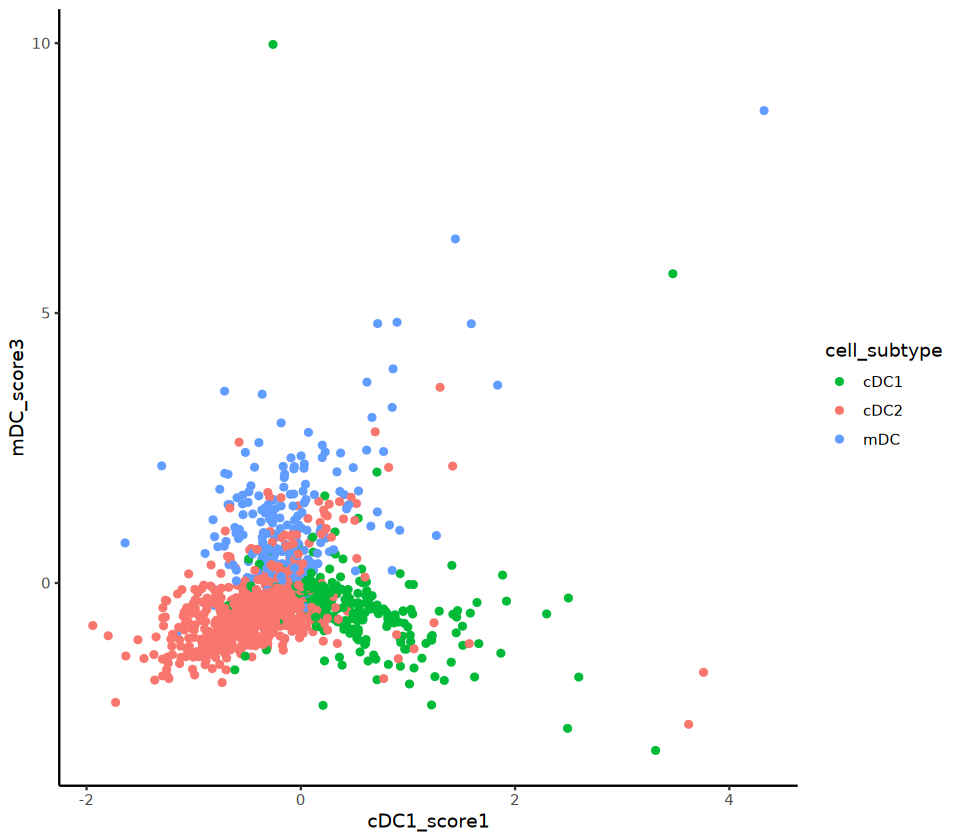

In [20]:
options(repr.plot.width = 8, repr.plot.height = 7)
library(ggplot2)
# Basic scatter plot
ggplot(obj.cDC@meta.data, aes(x=cDC1_score1, y=mDC_score3)) + geom_point(aes(col = cell_subtype)) + 
theme(panel.background = element_blank(), panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  axis.line = element_line(colour = "black")
  ) +
scale_colour_manual(values=c('#00BA38', '#F8766D','#619CFF'))

 - 2. mDC score on y axis, cDC2 score on x

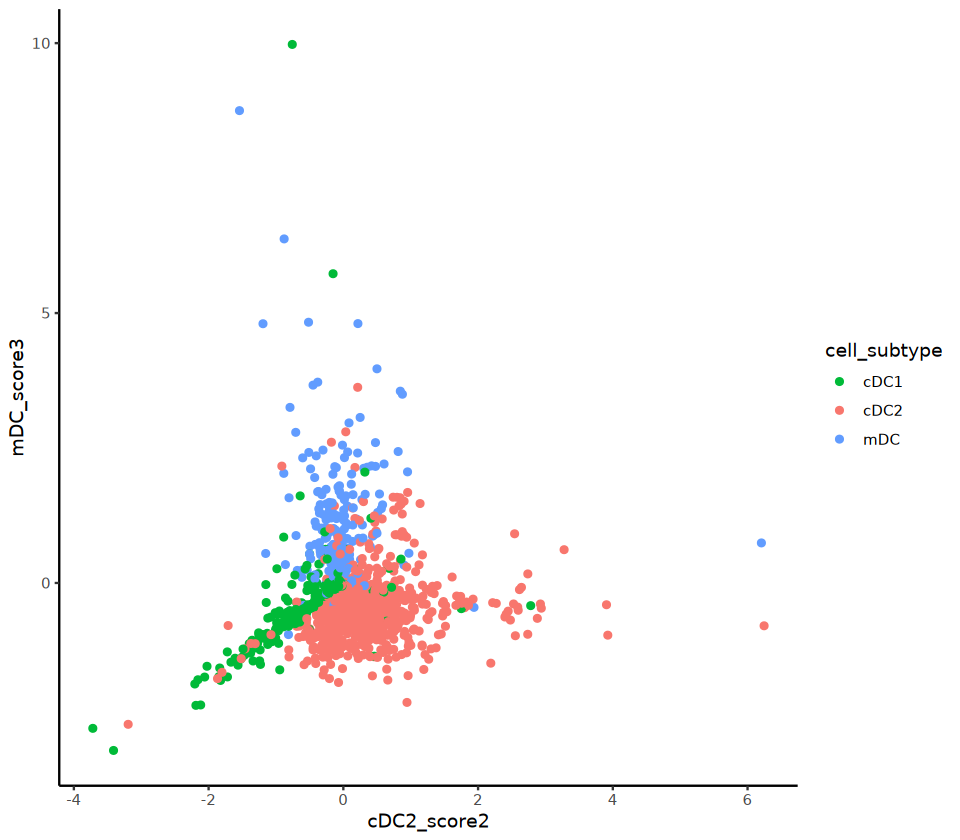

In [25]:
options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(obj.cDC@meta.data, aes(x=cDC2_score2, y=mDC_score3)) + geom_point(aes(col = cell_subtype)) + 
theme(panel.background = element_blank(), panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  axis.line = element_line(colour = "black")
  ) +
scale_colour_manual(values=c('#00BA38', '#F8766D','#619CFF'))

3. Plot similarly to how the paper used cDC1 and cDC2 scores on the same x axis
conditions:
 - cells with exclusively positive cDC2 scores plotted towards the right side of the x axis
 - cells with exclusively positive cDC1 scores plotted towards the left side of the x axis
 - all other cells (double positive or double negative scores) plotted at 0


In [26]:
#new column of added score of cDC1 or cDC2 
obj.cDC$combined_cDC1_cDC2_score <- 0
obj.cDC@meta.data$combined_cDC1_cDC2_score <- ifelse(obj.cDC$cDC1_score1 > 0 & obj.cDC$cDC2_score2 <= 0 , -obj.cDC$cDC1_score1, 0 )
obj.cDC@meta.data$combined_cDC1_cDC2_score <-ifelse(obj.cDC$cDC2_score2 > 0 & obj.cDC$cDC1_score1 <= 0, 
                                                    obj.cDC$cDC2_score2, obj.cDC@meta.data$combined_cDC1_cDC2_score )

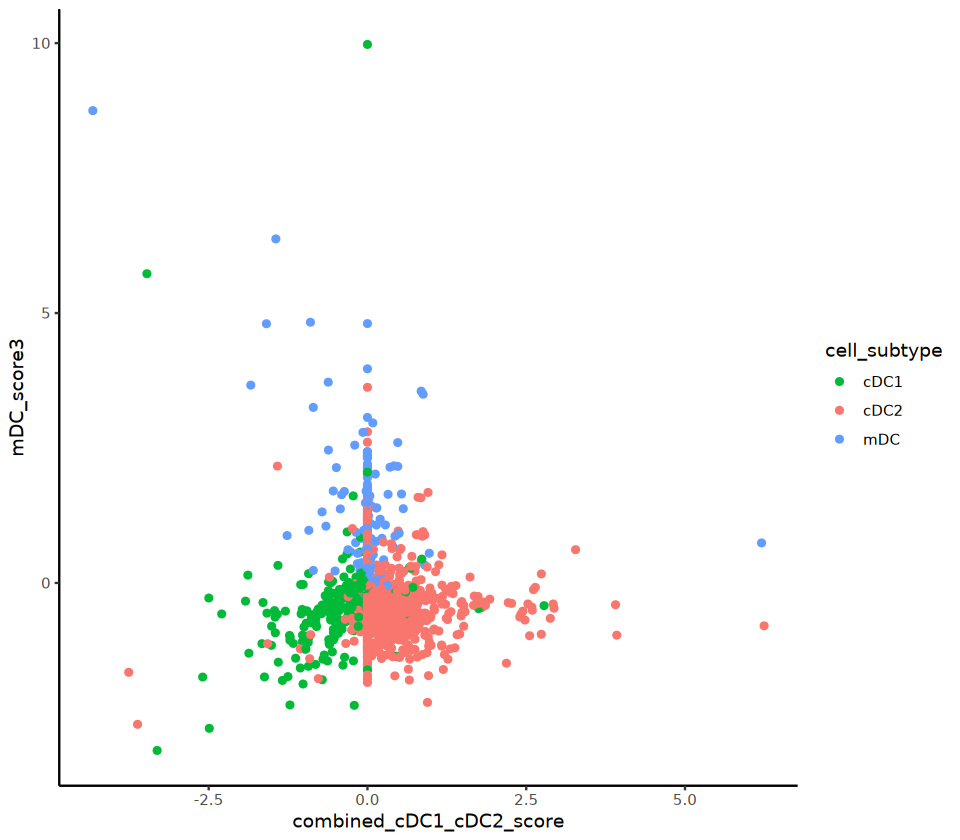

In [28]:
# EXTENDED FIGURE 4B
options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(obj.cDC@meta.data, aes(x=combined_cDC1_cDC2_score, y=mDC_score3)) + geom_point(aes(col = cell_subtype)) + 
theme(panel.background = element_blank(), panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  axis.line = element_line(colour = "black")
  ) + 
scale_colour_manual(values=c('#00BA38', '#F8766D','#619CFF'))

#ggsave('./ExtF4_Nature2020_DC_combined_cDC1_cDC2_score.pdf')